# Construct and analyze a stock correlation network

In [1]:
import copy
import numpy as np
import pandas as pd
from scipy import stats
from tqdm.notebook import tqdm
import yfinance as yf
import networkx as nx # https://networkx.org/documentation/stable/tutorial.html
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import bs4 as bs
import pickle
import requests

def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        ticker = ticker.replace('\n', '')
        tickers.append(ticker)

    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)

    return tickers

In [3]:
tickers = save_sp500_tickers()

In [4]:
ticker_data = pd.read_pickle("./sp500tickers.pickle")

In [5]:
ticker_data_reduced = ticker_data[:1000]
ticker_data_reduced_text = ' '.join(ticker_data_reduced)

In [6]:
ticker_data = yf.download(ticker_data_reduced_text,
                      start='2022-04-30',
                      end='2023-04-30',
                      group_by="ticker")
ticker_data.head()

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No timezone found, symbol may be delisted


MRNA                                      \
                           Open        High         Low       Close   
Date                                                                  
2022-05-02 00:00:00  134.869995  146.449997  134.820007  142.080002   
2022-05-03 00:00:00  141.929993  149.279999  137.529999  146.539993   
2022-05-04 00:00:00  153.479996  155.460007  142.227997  155.050003   
2022-05-05 00:00:00  151.869995  152.000000  138.649994  142.020004   
2022-05-06 00:00:00  139.699997  140.600006  131.000000  134.399994   

                                                CBRE                        \
                      Adj Close    Volume       Open       High        Low   
Date                                                                         
2022-05-02 00:00:00  142.080002   7773200  83.519997  84.089996  80.430000   
2022-05-03 00:00:00  146.539993   6326000  82.300003  84.260002  81.879997   
2022-05-04 00:00:00  155.050003  11093100  83.400002  85.580002  82.220001   
2022-05-05 00:00:00  142.020004   8060900  84.320000  85.959999  81.190002   
2022-05-06 00:00:00  134.399994   7013000  81.449997  83.110001  80.209999   

                                ...        BRO                                 \
                         Close  ...        Low      Close  Adj Close   Volume   
Date                            ...                                             
2022-05-02 00:00:00  82.440002  ...  58.549999  60.080002  59.538605  3251900   
2022-05-03 00:00:00  83.580002  ...  59.689999  59.959999  59.419685  2099000   
2022-05-04 00:00:00  85.570000  ...  58.820000  61.509998  60.955719  2328800   
2022-05-05 00:00:00  81.769997  ...  58.250000  58.959999  58.428699  1538200   
2022-05-06 00:00:00  81.220001  ...  57.509998  58.240002  57.816189  1880400   

                           VRSK                                      \
                           Open        High         Low       Close   
Date                                                                  
2022-05-02 00:00:00  203.639999  206.029999  199.009995  202.190002   
2022-05-03 00:00:00  201.050003  202.639999  198.800003  200.119995   
2022-05-04 00:00:00  186.000000  194.869995  184.220001  193.529999   
2022-05-05 00:00:00  190.509995  191.960007  186.080002  187.919998   
2022-05-06 00:00:00  186.309998  187.199997  183.440002  185.419998   

                                          
                      Adj Close   Volume  
Date                                      
2022-05-02 00:00:00  200.436050  1429600  
2022-05-03 00:00:00  198.384033  1398500  
2022-05-04 00:00:00  191.851166  2613000  
2022-05-05 00:00:00  186.289856  2006600  
2022-05-06 00:00:00  183.811539  1370000  

[5 rows x 3018 columns]

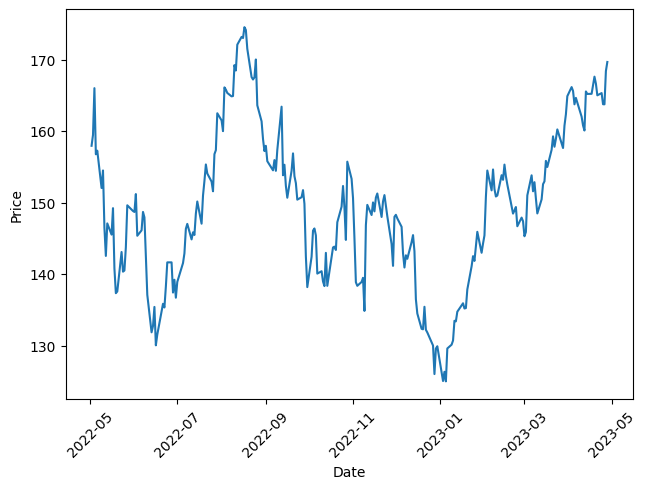

In [7]:
tkr = 'AAPL'
tkrd = ticker_data[tkr]
fig, ax = plt.subplots()
plt.xticks(rotation=45)
ax.plot(tkrd.index, tkrd['Close'])
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

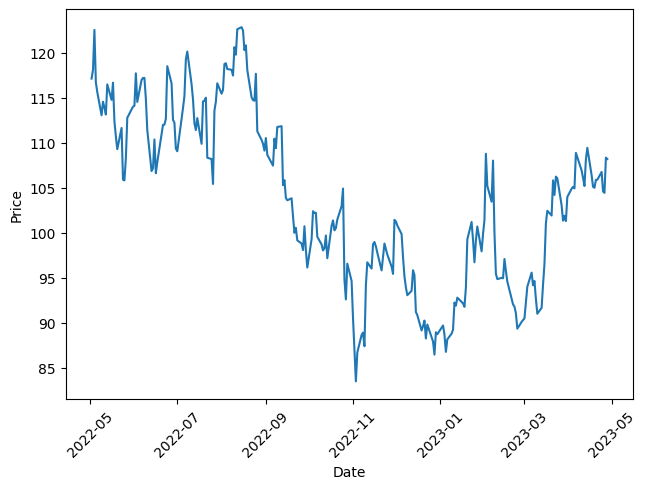

In [8]:
tkr = 'GOOG'
tkrd = ticker_data[tkr]
fig, ax = plt.subplots()
plt.xticks(rotation=45)
ax.plot(tkrd.index, tkrd['Close'])
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Assignment: print the time series of the Open price of the Amazon ticker

In [9]:
# Get the set of all the ticker names
# APPROACH 1
ticker_set = set([i[0] for i in ticker_data.columns.values if i[0][0]=='A'])
ticker_set

{'A',
 'AAL',
 'AAP',
 'AAPL',
 'ABBV',
 'ABC',
 'ABT',
 'ACGL',
 'ACN',
 'ADBE',
 'ADI',
 'ADM',
 'ADP',
 'ADSK',
 'AEE',
 'AEP',
 'AES',
 'AFL',
 'AIG',
 'AIZ',
 'AJG',
 'AKAM',
 'ALB',
 'ALGN',
 'ALK',
 'ALL',
 'ALLE',
 'AMAT',
 'AMCR',
 'AMD',
 'AME',
 'AMGN',
 'AMP',
 'AMT',
 'AMZN',
 'ANET',
 'ANSS',
 'AON',
 'AOS',
 'APA',
 'APD',
 'APH',
 'APTV',
 'ARE',
 'ATO',
 'ATVI',
 'AVB',
 'AVGO',
 'AVY',
 'AWK',
 'AXON',
 'AXP',
 'AZO'}

In [10]:
# Get the set of all the ticker names
# APPROACH 2
ticker_set = set()
for i in ticker_data.columns:
  if i[0][0] != 'A':
    continue
  ticker_set.add(i[0])

ticker_set

{'A',
 'AAL',
 'AAP',
 'AAPL',
 'ABBV',
 'ABC',
 'ABT',
 'ACGL',
 'ACN',
 'ADBE',
 'ADI',
 'ADM',
 'ADP',
 'ADSK',
 'AEE',
 'AEP',
 'AES',
 'AFL',
 'AIG',
 'AIZ',
 'AJG',
 'AKAM',
 'ALB',
 'ALGN',
 'ALK',
 'ALL',
 'ALLE',
 'AMAT',
 'AMCR',
 'AMD',
 'AME',
 'AMGN',
 'AMP',
 'AMT',
 'AMZN',
 'ANET',
 'ANSS',
 'AON',
 'AOS',
 'APA',
 'APD',
 'APH',
 'APTV',
 'ARE',
 'ATO',
 'ATVI',
 'AVB',
 'AVGO',
 'AVY',
 'AWK',
 'AXON',
 'AXP',
 'AZO'}

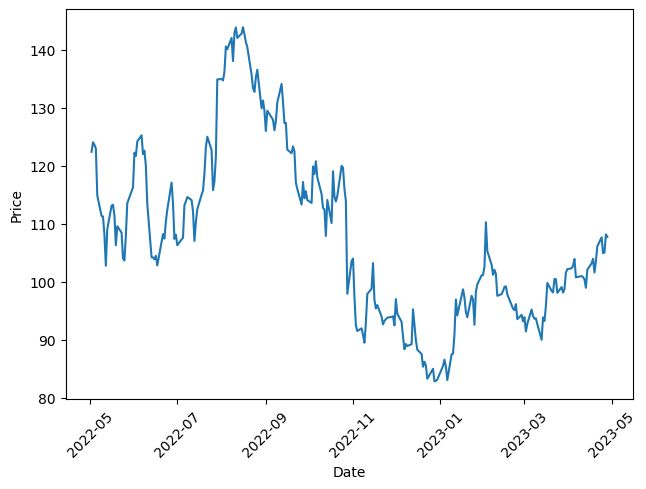

In [ ]:
tkr = 'AMZN' # Add the Amazon ticker name here
tkrd = ticker_data[tkr]
fig, ax = plt.subplots()
plt.xticks(rotation=45)
ax.plot(tkrd.index, tkrd['Open']) # Edit the column name
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Calculate the correlations


In [ ]:
tickers_reduced = tickers[:20]
tickers_reduced = np.random.choice(tickers, 50, replace=False)
tickers_seen = [t for t in tickers_reduced]
sources = []
targets = []
corrs = []
pvals = []
with tqdm(total=len(tickers_reduced)) as pbar:
    for tkr1 in tickers_reduced:
        # Avoid double counting
        tickers_seen.remove(tkr1)
        for tkr2 in tickers_seen:
            d1 = ticker_data[tkr1]['Close']
            d2 = ticker_data[tkr2]['Close']
            if np.any(d1.isna()) or np.any(d2.isna()):
                continue
            corr, pval = stats.kendalltau(d1, d2) # Assignment: add the correct correlation function here
            sources.append(tkr1)
            targets.append(tkr2)
            corrs.append(corr)
            pvals.append(pval)
        pbar.update(1)
corrs_df = pd.DataFrame({"Source": sources,
                        "Target": targets,
                        "Correlation": corrs,
                        "p-value": pvals})
corrs_df.to_pickle("./ticker_correlations_kendall.pkl")

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
corrs_df

Source Target  Correlation       p-value
0      POOL   BALL     0.626135  3.539344e-49
1      POOL    LIN     0.043154  3.095133e-01
2      POOL     DE    -0.180098  2.222457e-05
3      POOL    BAC     0.236851  2.480386e-08
4      POOL   KLAC     0.107230  1.156658e-02
...     ...    ...          ...           ...
1220    EIX   ORCL     0.391750  2.958645e-20
1221    EIX   HBAN    -0.103944  1.451733e-02
1222    LYV   ORCL    -0.336766  2.188127e-15
1223    LYV   HBAN     0.040817  3.369210e-01
1224   ORCL   HBAN     0.192997  5.618170e-06

[1225 rows x 4 columns]

# Assignment: construct and show a small network from an adjacency matrix

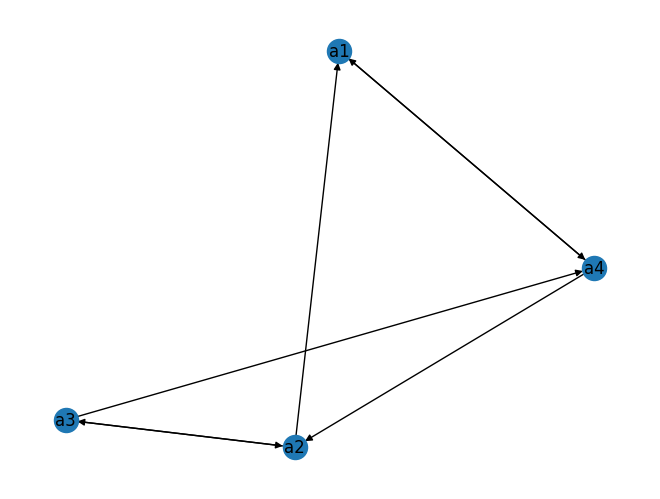

In [14]:
import networkx as nx # https://networkx.org/documentation/stable/tutorial.html
import matplotlib.pyplot as plt
import numpy as np

# Define the adjacency matrix as a NumPy ndarray
adjacency_matrix = np.array([[0, 0, 0, 1],
                             [1, 0, 1, 0],
                             [0, 1, 0, 1],
                             [1, 1, 0, 0]])
labels = {0: 'a1', 1: 'a2', 2: 'a3', 3: 'a4'}

# Create a directed graph from the adjacency matrix
G = nx.from_numpy_array(adjacency_matrix, create_using=nx.DiGraph)

# Draw the graph
nx.draw(G, with_labels=True, labels=labels,
        arrows=True)

# Display the graph
plt.show()


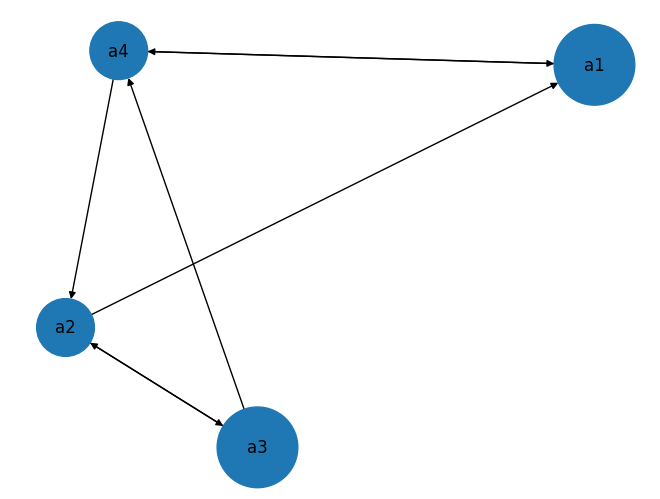

In [15]:
# Calculate the clustering coefficient of each node
clustering = nx.clustering(G)

# Set the node labels
nx.set_node_attributes(G, labels, 'label')

# Set the node sizes proportional to the clustering coefficient
node_sizes = [(30 * clustering[node])**3 for node in G.nodes()]

# Draw the graph with node sizes and labels
nx.draw(G, with_labels=True, labels=labels, node_size=node_sizes, arrows=True)

# Display the graph
plt.show()

In [ ]:
clustering

{0: 0.5, 1: 0.4, 2: 0.5, 3: 0.4}

# Build the network

In [ ]:
# Let's build an undirected graph
G = nx.Graph()

for source, target, corr, p in corrs_df.itertuples(index=False):
  G.add_node(source)
  G.add_node(target)
  if corr > 0.6 and p < 0.05:
    G.add_edge(source, target)

In [ ]:
# See how many nodes we have in the network
# list(G.nodes) # <--- lists the node ids
G.number_of_nodes()

50

In [ ]:
# Let's compare to the number of tickers in our DataFrame
print(f"Number of sources: {len(corrs_df['Source'].unique())}")
corrs_df['Source'].unique()

Number of sources: 49


array(['POOL', 'BALL', 'LIN', 'DE', 'BAC', 'KLAC', 'BMY', 'PEP', 'WAT',
       'COF', 'TYL', 'WTW', 'XRAY', 'CAG', 'EOG', 'F', 'BEN', 'GNRC',
       'BWA', 'EMR', 'SEE', 'CTLT', 'GPN', 'SBUX', 'ENPH', 'UAL', 'HAS',
       'TPR', 'MU', 'ADSK', 'LMT', 'DVA', 'FE', 'GS', 'DTE', 'TECH',
       'IEX', 'RL', 'CZR', 'HON', 'MSCI', 'MLM', 'VRSN', 'ODFL', 'OTIS',
       'APA', 'EIX', 'LYV', 'ORCL'], dtype=object)

In [ ]:
# Why isn't it the same number as the number of nodes?

# Visualize the network

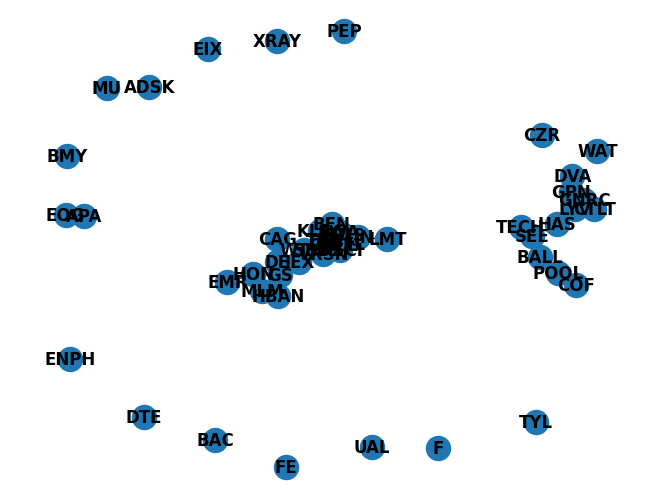

In [ ]:
nx.draw(G, with_labels=True, font_weight='bold')

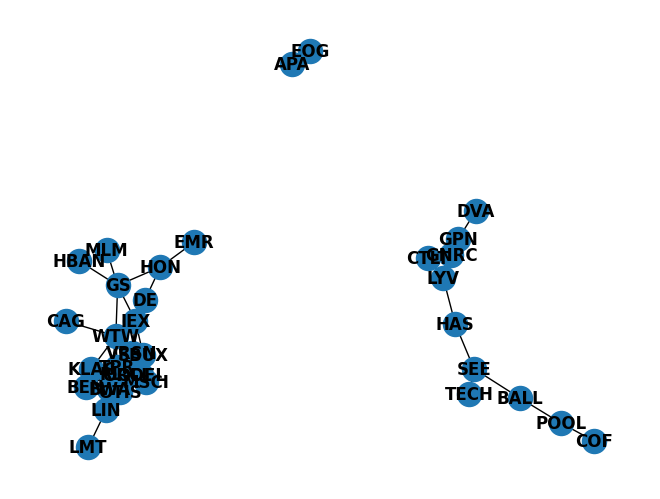

In [ ]:
# Remove disconnected nodes
G_copy = G.copy()
for n in G_copy.nodes:
  if len(list(nx.neighbors(G, n))) == 0:
    G.remove_node(n)

nx.draw(G, with_labels=True, font_weight='bold')

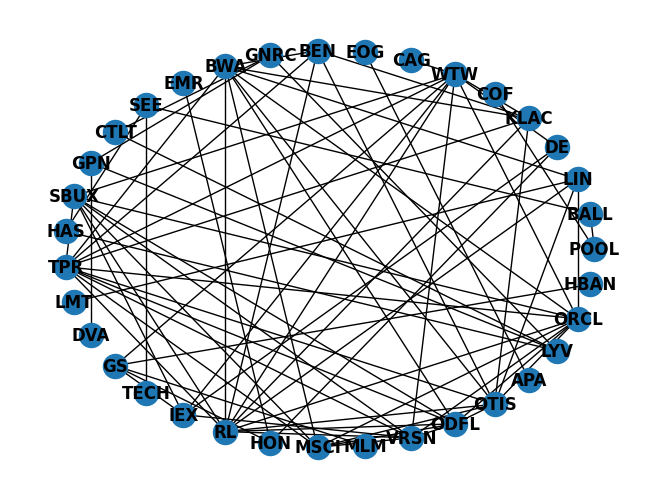

In [ ]:
nx.draw_circular(G, with_labels=True, font_weight='bold')

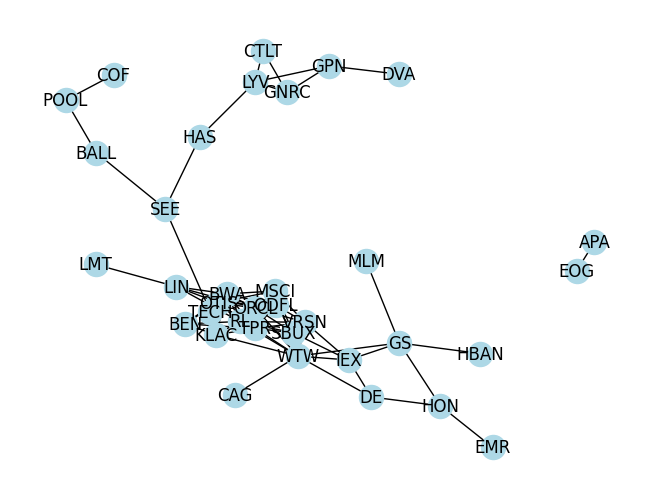

In [ ]:
# Let's draw a slightly nicer visualization
pos = nx.spring_layout(G, scale=30, k=2/np.sqrt(G.order()))
nx.draw(G, pos, node_color='lightblue',
        with_labels=True)

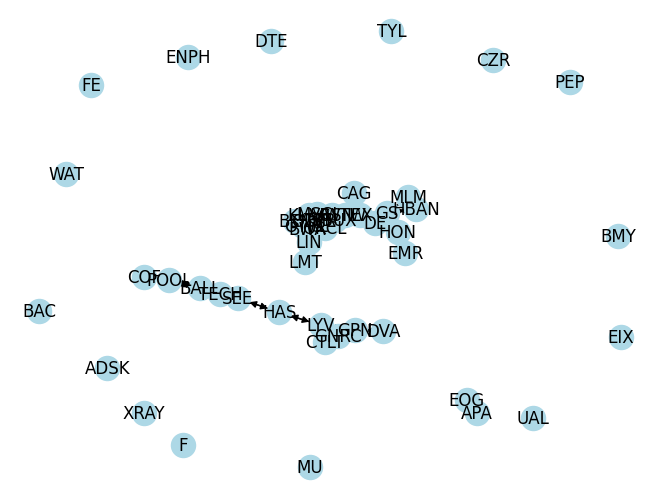

In [ ]:
# Let's build and vizualize a directed graph
dG = G.to_directed()

for source, target, corr, p in corrs_df.itertuples(index=False):
  dG.add_node(source)
  dG.add_node(target)
  if corr > 0.6 and p < 0.05:
    dG.add_edge(source, target)

nx.draw(dG, node_color='lightblue', with_labels=True)

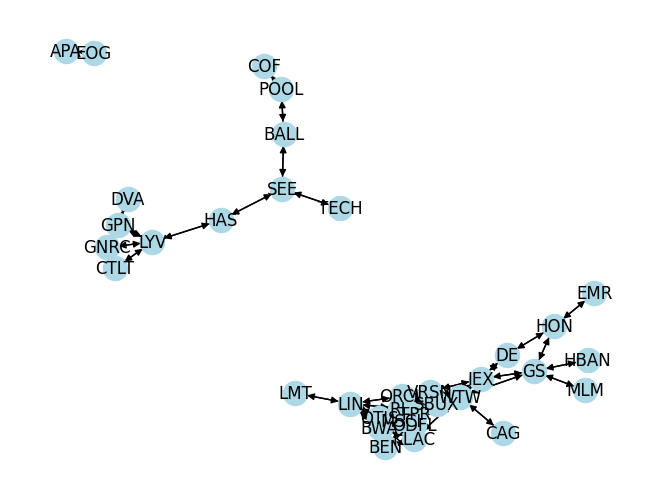

In [ ]:
# Remove disconnected nodes
dG_copy = dG.copy()
for n in dG_copy.nodes:
  if len(list(nx.neighbors(dG, n))) == 0:
    dG.remove_node(n)

nx.draw(dG, node_color='lightblue', with_labels=True)

# Stochastic graphs

100
100
184


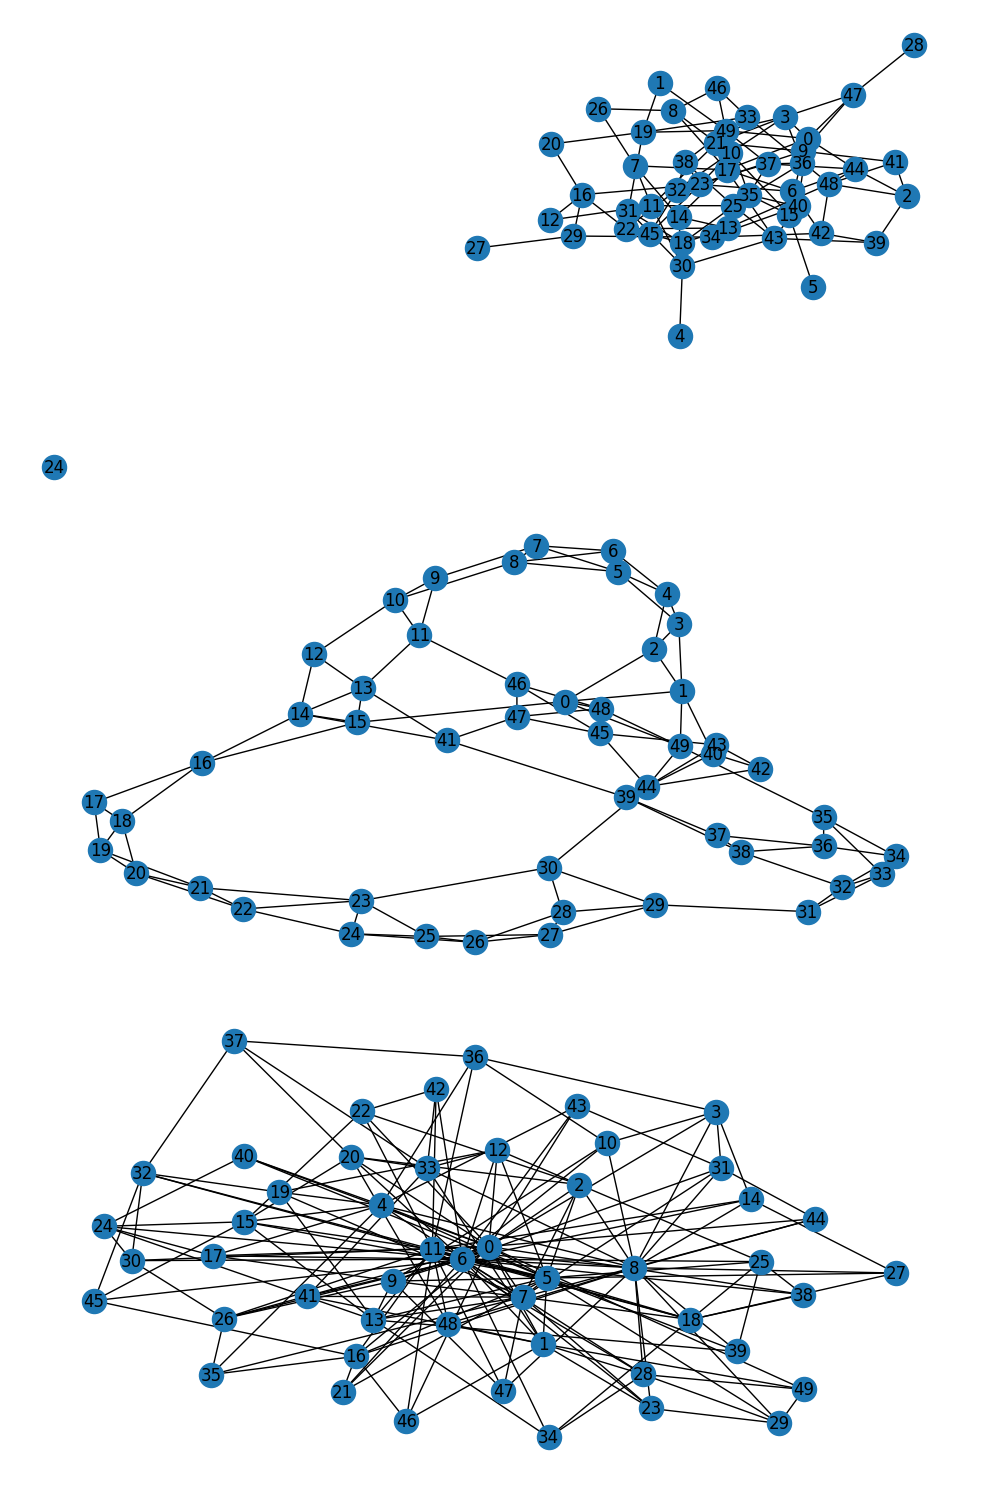

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

num_nodes = 50
num_edges = 100  # The number of edges to be maintained across all graphs
SEED = 95

# Create an Erdos-Renyi graph with 50 nodes and 100 edges
er = nx.erdos_renyi_graph(num_nodes, num_edges / (num_nodes * (num_nodes - 1) / 2), seed=SEED)
er = nx.gnm_random_graph(num_nodes, num_edges)

# Create a Watts-Strogatz graph with 50 nodes, each node connected to its 4 nearest neighbors,
# and rewiring probability of 0.1
ws = nx.watts_strogatz_graph(num_nodes, 4, 0.1, seed=SEED)

# Create a Barabasi-Albert graph with 50 nodes and each new node connecting to 4 existing nodes
ba = nx.barabasi_albert_graph(num_nodes, 4, seed=SEED)

# Verify that all three graphs have the same number of edges
print(er.number_of_edges())
print(ws.number_of_edges())
print(ba.number_of_edges())

fig = plt.figure(1, figsize=(10, 15))

# Draw the Erdos-Renyi graph
plt.subplot(311)
nx.draw(er, with_labels=True)

# Draw the Watts-Strogatz graph
plt.subplot(312)
nx.draw(ws, with_labels=True)

# Draw the Barabasi-Albert graph
plt.subplot(313)
nx.draw(ba, with_labels=True)

# Display the graphs
plt.tight_layout()
plt.show()

In [ ]:
er = nx.erdos_renyi_graph(50, 0.15)

ws = nx.watts_strogatz_graph(50, 5, 0.5)

ba = nx.barabasi_albert_graph(50, 5)

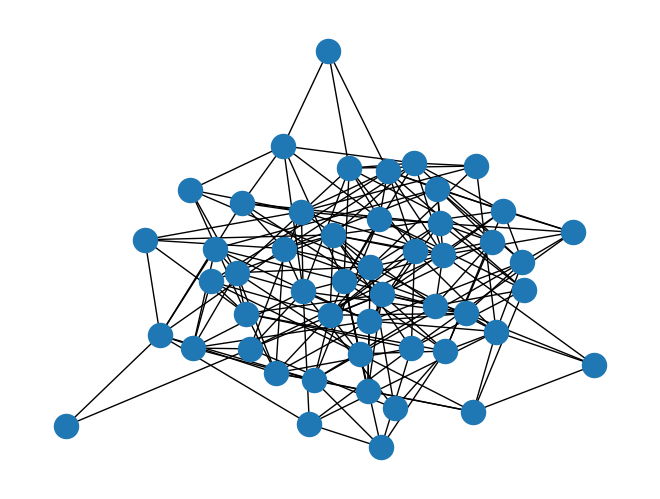

In [ ]:
nx.draw(er)

# Telling a story through visualization

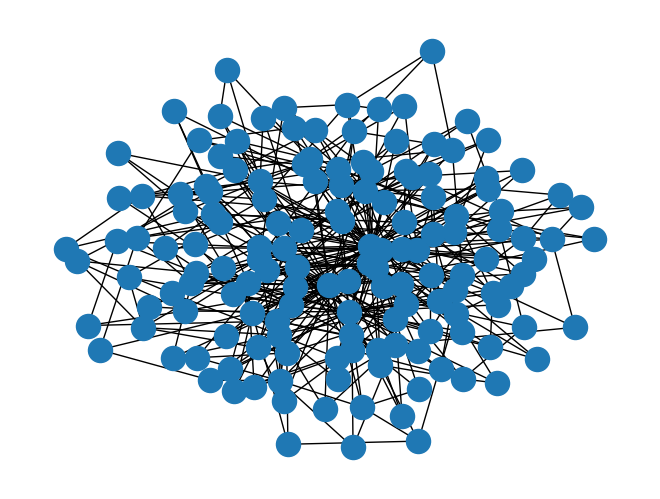

In [17]:
ba = nx.barabasi_albert_graph(150, 3)
nx.draw(ba)

# Assignment: draw the above graph but the node size must be proportionate to the eigenvector centrality

In [18]:
# Get the dictionary of the eigenvector centralities of ba, using a function from the networkx library
centrality_dict = nx.eigenvector_centrality(ba)
centrality_dict_sorted = {k:v for k,v in sorted(centrality_dict.items(), key=lambda items: items[1], reverse=True)}
# centrality_dict_sorted

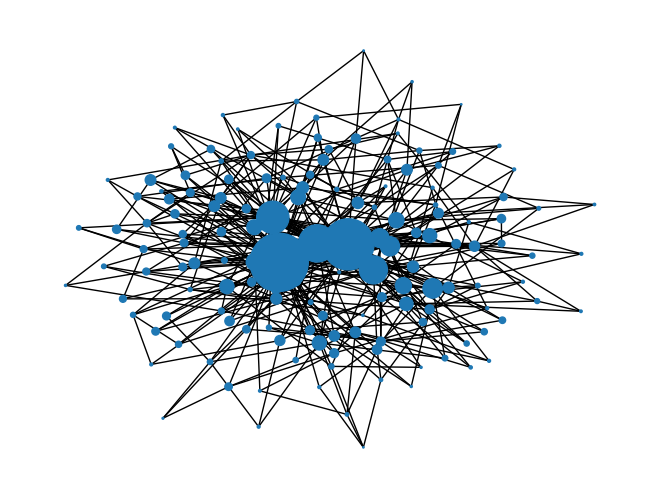

In [19]:
# set node sizes proportional to their closeness centrality
node_sizes = [1e4 * i*i for i in centrality_dict.values()]

# draw the graph with node sizes proportional to their closeness centrality
nx.draw(ba, node_size=node_sizes)

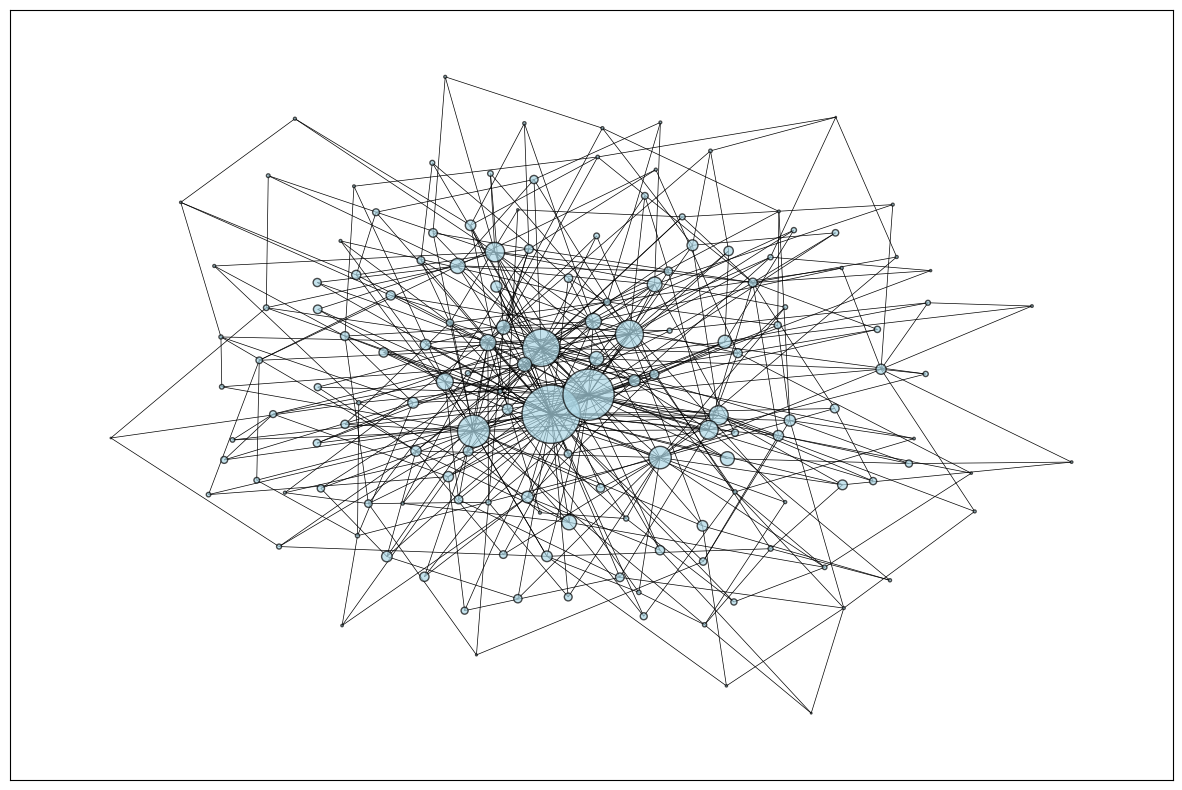

In [20]:
# Let's draw a prettier version of it
# For that, we need to define the layout options for nodes and graphs separately

# First, define the figure size
fig = plt.figure(1, figsize=(15, 10))

# Second, define the node positions
pos = nx.spring_layout(ba, scale=40, k=1/np.sqrt(ba.order()))

# Third, define the node layout options
nx.draw_networkx_nodes(ba, pos, node_size=node_sizes, node_color='lightblue',
                       linewidths=1, edgecolors='black', alpha=0.7)

# Fourth, define the edge layout options
nx.draw_networkx_edges(ba, pos, width=0.5)

<ipython-input-21-5b9586b8baf6>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Blues') # create a colormap that ranges from dark blue to light blue


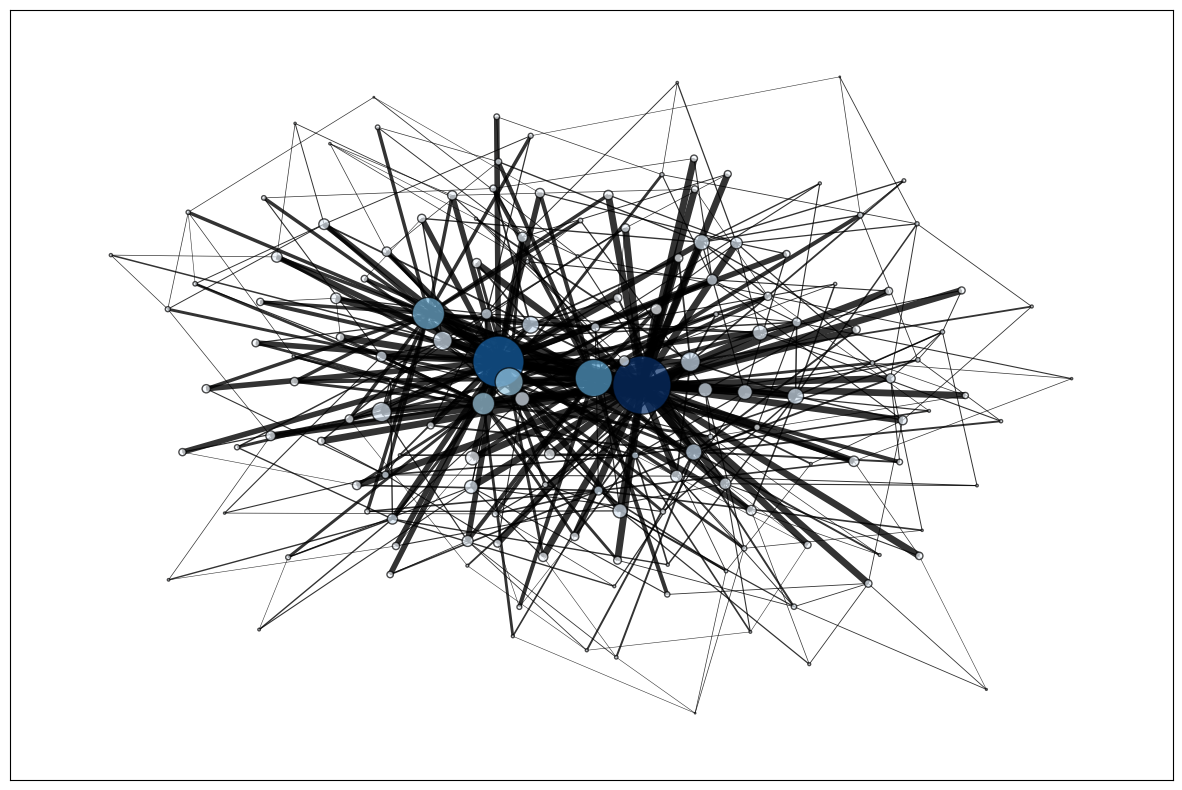

In [21]:
# Let's make the node colors informative
# For this, we need to prepare the colors and the colormap
import matplotlib.colors as colors

cmap = plt.cm.get_cmap('Blues') # create a colormap that ranges from dark blue to light blue

# get the degree of each node
degrees = dict(ba.degree())

# set the color of each node proportional to its degree
node_colors = [cmap(colors.Normalize(vmin=min(degrees.values()), vmax=max(degrees.values()))(degrees[i])) for i in range(ba.number_of_nodes())]

# First, define the figure size
fig = plt.figure(1, figsize=(15, 10))

# Second, define the node positions
pos = nx.spring_layout(ba, scale=40, k=1/np.sqrt(ba.order()))

# Third, define the node layout options
nx.draw_networkx_nodes(ba, pos, node_size=node_sizes, node_color=node_colors,
                       linewidths=1, edgecolors='black', alpha=0.7)

edge_widths = [0.1 * degrees[u] for u, v in ba.edges()]
# Fourth, define the edge layout options
nx.draw_networkx_edges(ba, pos, width=edge_widths, alpha=0.8)

<ipython-input-22-80f8ca275a1f>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Blues') # create a colormap that ranges from dark blue to light blue


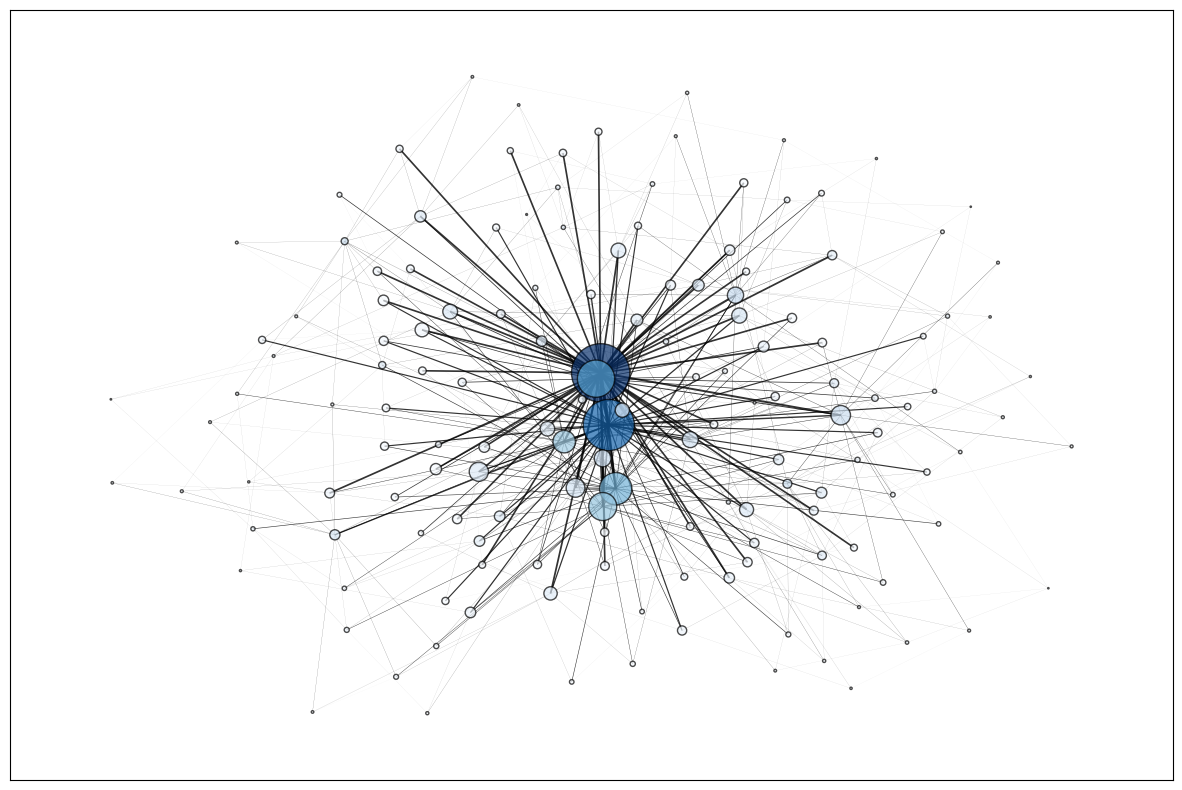

In [22]:
# Let's make the node colors informative
# For this, we need to prepare the colors and the colormap
import matplotlib.colors as colors

cmap = plt.cm.get_cmap('Blues') # create a colormap that ranges from dark blue to light blue

# get the degree of each node
degrees = dict(ba.degree())

# set the color of each node proportional to its degree
node_colors = [cmap(colors.Normalize(vmin=min(degrees.values()), vmax=max(degrees.values()))(degrees[i])) for i in range(ba.number_of_nodes())]

# First, define the figure size
fig = plt.figure(1, figsize=(15, 10))

# Second, define the node positions
pos = nx.spring_layout(ba, scale=40, k=1/np.sqrt(ba.order()))

# Third, define the node layout options
nx.draw_networkx_nodes(ba, pos, node_size=node_sizes, node_color=node_colors,
                       linewidths=1, edgecolors='black', alpha=0.7)

# calculate the clustering coefficient of each node
b_centrality = nx.betweenness_centrality(ba)
# set the width of each edge proportional to the average betweenness centrality of two nodes
edge_widths = [4 * (b_centrality[u]+b_centrality[v]) for u, v in ba.edges()]
# Fourth, define the edge layout options
nx.draw_networkx_edges(ba, pos, width=edge_widths, alpha=0.8)

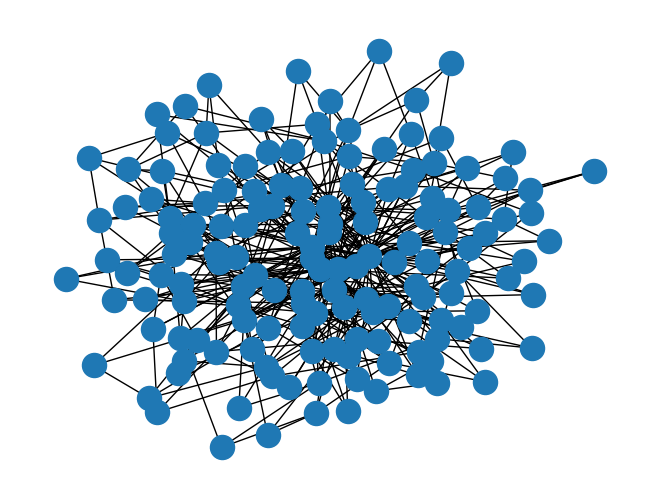

In [23]:
# For reference, this is our original graph.
# Having a better visualization, helps tell a better story (and gain attention)
nx.draw(ba)

<ipython-input-15-269555fe302c>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Blues') # create a colormap that ranges from dark blue to light blue


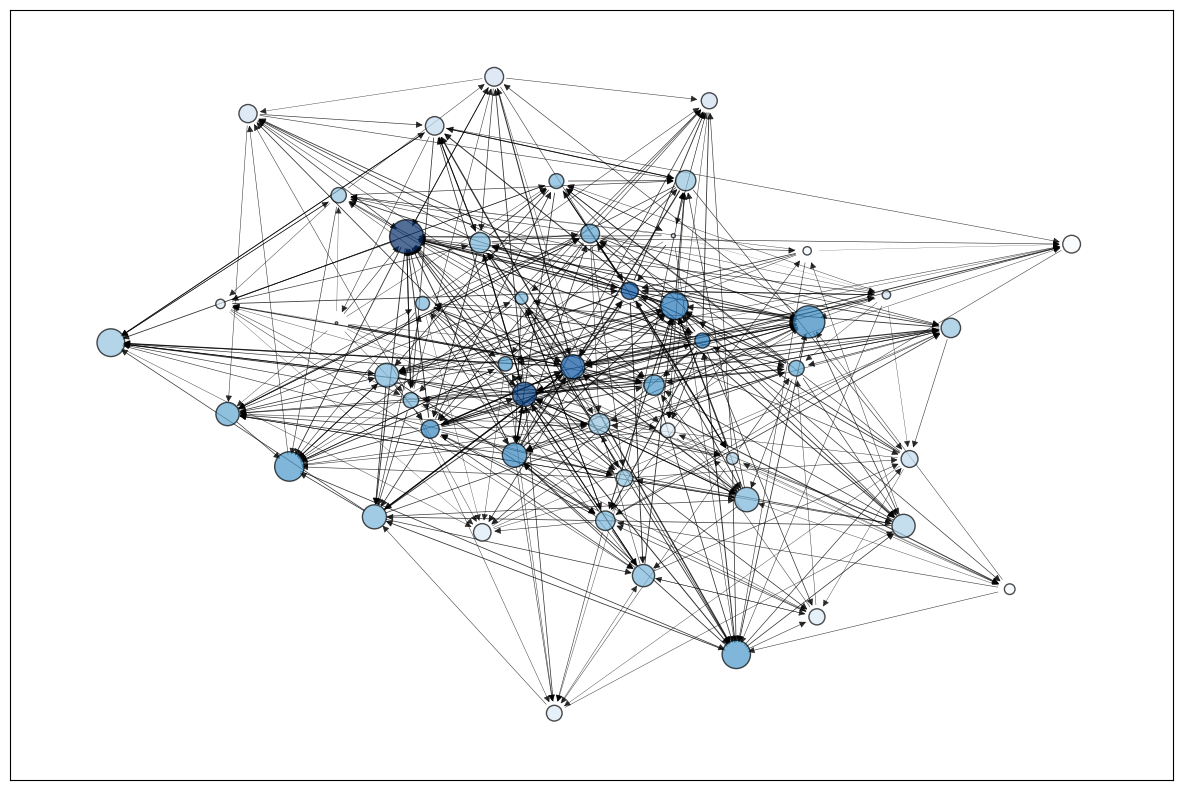

In [ ]:
# Let's look at the same visualization but with a Directed Erdos-Renyi graph
er = nx.erdos_renyi_graph(50, 0.15, directed=True)
# For this, we need to prepare the colors and the colormap
import matplotlib.colors as colors

cmap = plt.cm.get_cmap('Blues') # create a colormap that ranges from dark blue to light blue

# get the degree of each node
degrees = dict(er.degree())

centrality_dict = nx.eigenvector_centrality(er)
centrality_dict_sorted = {k:v for k,v in sorted(centrality_dict.items(), key=lambda items: items[1], reverse=True)}

# set node sizes proportional to their closeness centrality
node_sizes = [1e4 * i*i for i in centrality_dict.values()]

# set the color of each node proportional to its degree
node_colors = [cmap(colors.Normalize(vmin=min(degrees.values()), vmax=max(degrees.values()))(degrees[i])) for i in range(er.number_of_nodes())]

# First, define the figure size
fig = plt.figure(1, figsize=(15, 10))

# Second, define the node positions
pos = nx.spring_layout(er, scale=40, k=1/np.sqrt(er.order()))

# Third, define the node layout options
nx.draw_networkx_nodes(er, pos, node_size=node_sizes, node_color=node_colors,
                       linewidths=1, edgecolors='black', alpha=0.7)

# calculate the clustering coefficient of each node
b_centrality = nx.betweenness_centrality(er)
# set the width of each edge proportional to the average betweenness centrality of two nodes
edge_widths = [10 * (b_centrality[u]+b_centrality[v]) for u, v in er.edges()]
# Fourth, define the edge layout options
nx.draw_networkx_edges(er, pos, width=edge_widths, alpha=0.8)

<ipython-input-67-86bdceb0daa1>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Blues') # create a colormap that ranges from dark blue to light blue


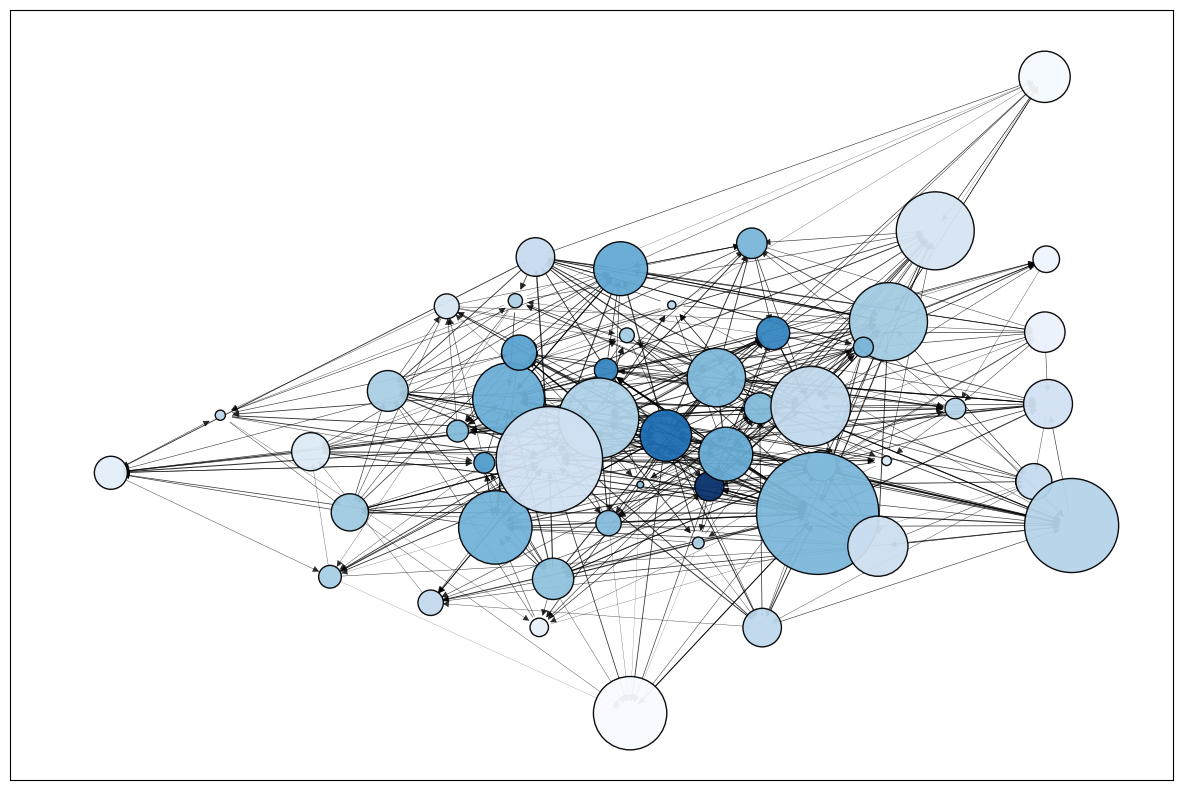

In [ ]:
# Let's investigate the HITS centrality of our Directed Erdos-Renyi graph
# For this, we need to prepare the colors and the colormap
import matplotlib.colors as colors

cmap = plt.cm.get_cmap('Blues') # create a colormap that ranges from dark blue to light blue

# get the degree of each node
h, a = nx.hits(er)

# set node sizes proportional to their AUTHORITY
node_sizes = [100 * i * 1e3 * i * 1e3 * i for i in a.values()]

# set the color of each node proportional to its HUB metric
node_colors = [cmap(colors.Normalize(vmin=min(h.values()), vmax=max(h.values()))(v)) for v in h.values()]

# First, define the figure size
fig = plt.figure(1, figsize=(15, 10))

# Second, define the node positions
pos = nx.spring_layout(er, scale=40, k=1/np.sqrt(er.order()))

# Third, define the node layout options
nx.draw_networkx_nodes(er, pos, node_size=node_sizes, node_color=node_colors,
                       linewidths=1, edgecolors='black', alpha=0.95)

# calculate the clustering coefficient of each node
b_centrality = nx.betweenness_centrality(er)
# set the width of each edge proportional to the average betweenness centrality of two nodes
edge_widths = [10 * (b_centrality[u]+b_centrality[v]) for u, v in er.edges()]
# Fourth, define the edge layout options
nx.draw_networkx_edges(er, pos, width=edge_widths, alpha=0.8)